<img src="./figures/Logo_KIT.svg" width=200px style="float:right;" />

# Fakultät für Physik 

## Physikalisches Praktikum P1 für Studierende der Physik

Versuch P1-71, 72, 73 (Stand: Dezember 2022)

[Raum F1-14](http://www-ekp.physik.uni-karlsruhe.de/~simonis/praktikum/layoutobjekte/Lageplan_P1.png)

# Spezifische Ladung des Elektrons

Name: Aichert    Vorname: Julius E-Mail: uhoeb@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Achtner   Vorname: Martin E-Mail: urrvl@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo01

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 8.11.2023

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________



# Durchführung

## Aufgabe 1: Fadenstrahlrohr

**Hinweise zu allen hier durchzuführenden Messungen finden Sie in der Datei [Hinweise-Aufgabe-1.md](https://git.scc.kit.edu/etp-lehre/p1-for-students/-/blob/main/Spezifische_Lading_des_Elektrons/doc/Hinweise-Aufgabe-1.md).**

### Aufgabe 1.1: Magnetfeld im Fadenstrahlrohr

 * Schätzen Sie das Magnetfeld $B$, entlang der Mittelebene zwischen $H_{1}$ und $H_{2}$ im Inneren der Spulen, mit Hilfe einer baugleichen, weiteren Helmholtzspule $H_{3}$, einer, an verschiedenen Stellen mit Bohrungen versehenen, Holzplatte $M$, und einer [Hall-Sonde](https://de.wikipedia.org/wiki/Hall-Effekt) ab. Dabei bezeichnet $r$ im Folgenden den Abstand von der Symmetrieachse des Spulenpaares.
 * Kalibrieren Sie die Hall-Sonde mit Hilfe einer weiteren, langen Spule, deren Magnetfeld Sie über das [Ampèresche Gesetz](https://de.wikipedia.org/wiki/Amp%C3%A8resches_Gesetz#Magnetfeld_der_Spule) bestimmen können.
 * Diskutieren Sie die Homogenität von $B(r)$ für die vorliegende Spulenanordnung. 
 * Vergleichen Sie Ihre Messung für $r=0$ mit Ihrer Erwartung. 
 
---

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import kafe2
#import PhyPraKit as ppk
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import scipy
mpl.rcParams['figure.dpi']=200
mu = scipy.constants.mu_0

**Lösung:**

In [6]:
hall_helmh = np.genfromtxt( "hall_spannung_helmholtz.csv", delimiter=",", skip_header=1 ) # Einlesen der Daten, speichern in Variablen
pos = hall_helmh[:,0]
I_helmh = hall_helmh[:,1]
U_helmh = hall_helmh[:,2]
#print(pos, I_helmh, U_helmh)
hall_cal = np.genfromtxt( "hall_spannung_kalibrierung.csv", delimiter=",", skip_header=1 ) # Einlesen der Daten, speichern in Variablen
I_cal = hall_cal[:,0]
U_cal = hall_cal[:,1]

Bei einer Stromstärke von 2.002 A varriiert der Wert vor und nach der Messung, aufgrund von Erhitzung um 52.20 mV und 51.49mV
Bei der Kallibrierung wurde keine nennenswerten Unterschiede zwischen der ersten und der letzten Messung bei der Hallspannung festgestellt.

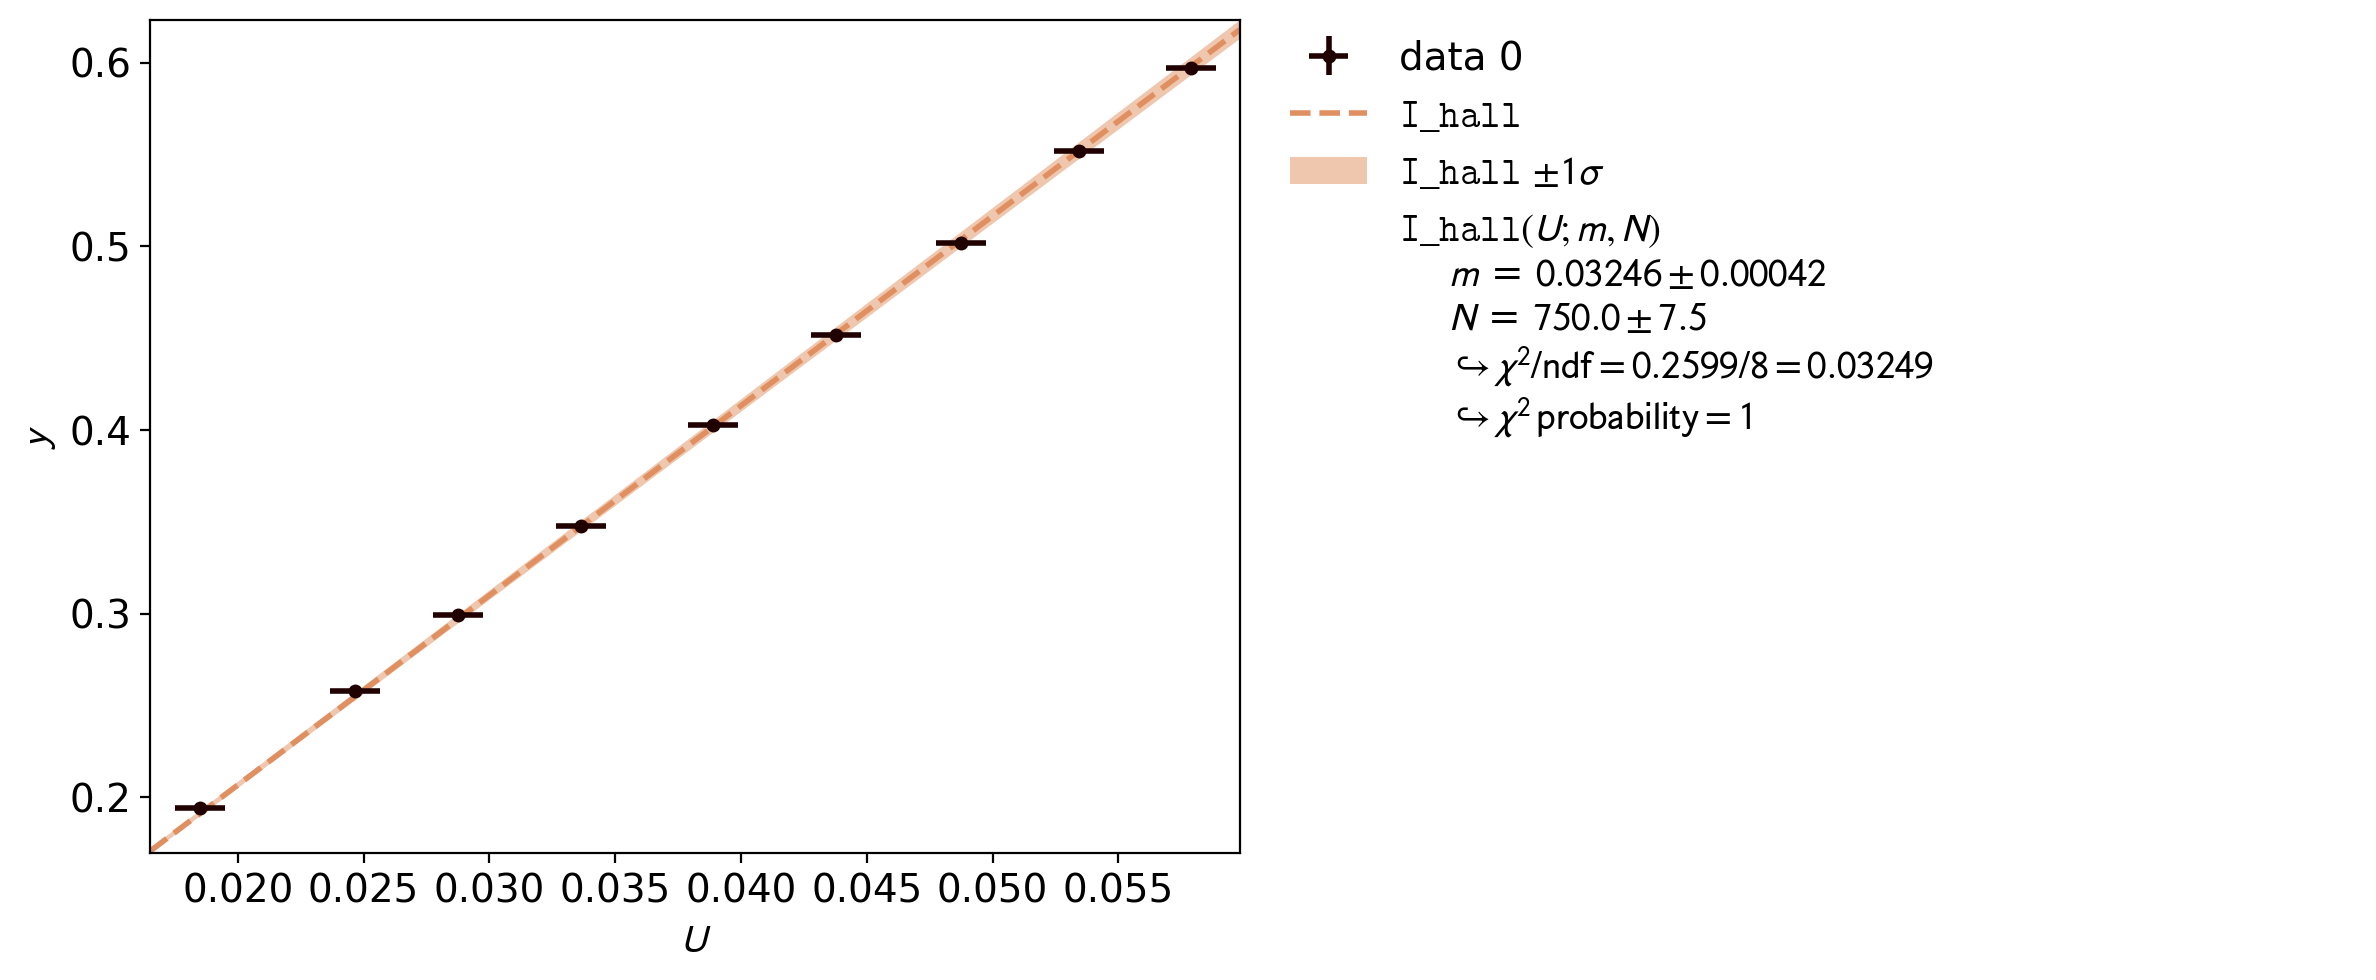

0.03245911992610037


In [29]:
def I_hall(U, m, N):
    l = 0.3
    return m * U / (mu * N) * l
I_error = 0.001
U_error = 0.001 
N_error = 0.01 # relative
fit = kafe2.XYFit(xy_data=[-U_cal * 10**(-3), I_cal], model_function=I_hall) 
fit.add_error(axis='y', err_val=I_error)
fit.add_error(axis='x', err_val=U_error)

fit.add_parameter_constraint(name='N',   value=750,   uncertainty=N_error, relative=True)

fit.do_fit()
plot = kafe2.Plot(fit)
plot.plot()
plot.show()

par_vals = fit.parameter_values
par_err = fit.parameter_errors
m = par_vals[0]
m_err = par_err[0]
print(m)

0.0009069078107352444


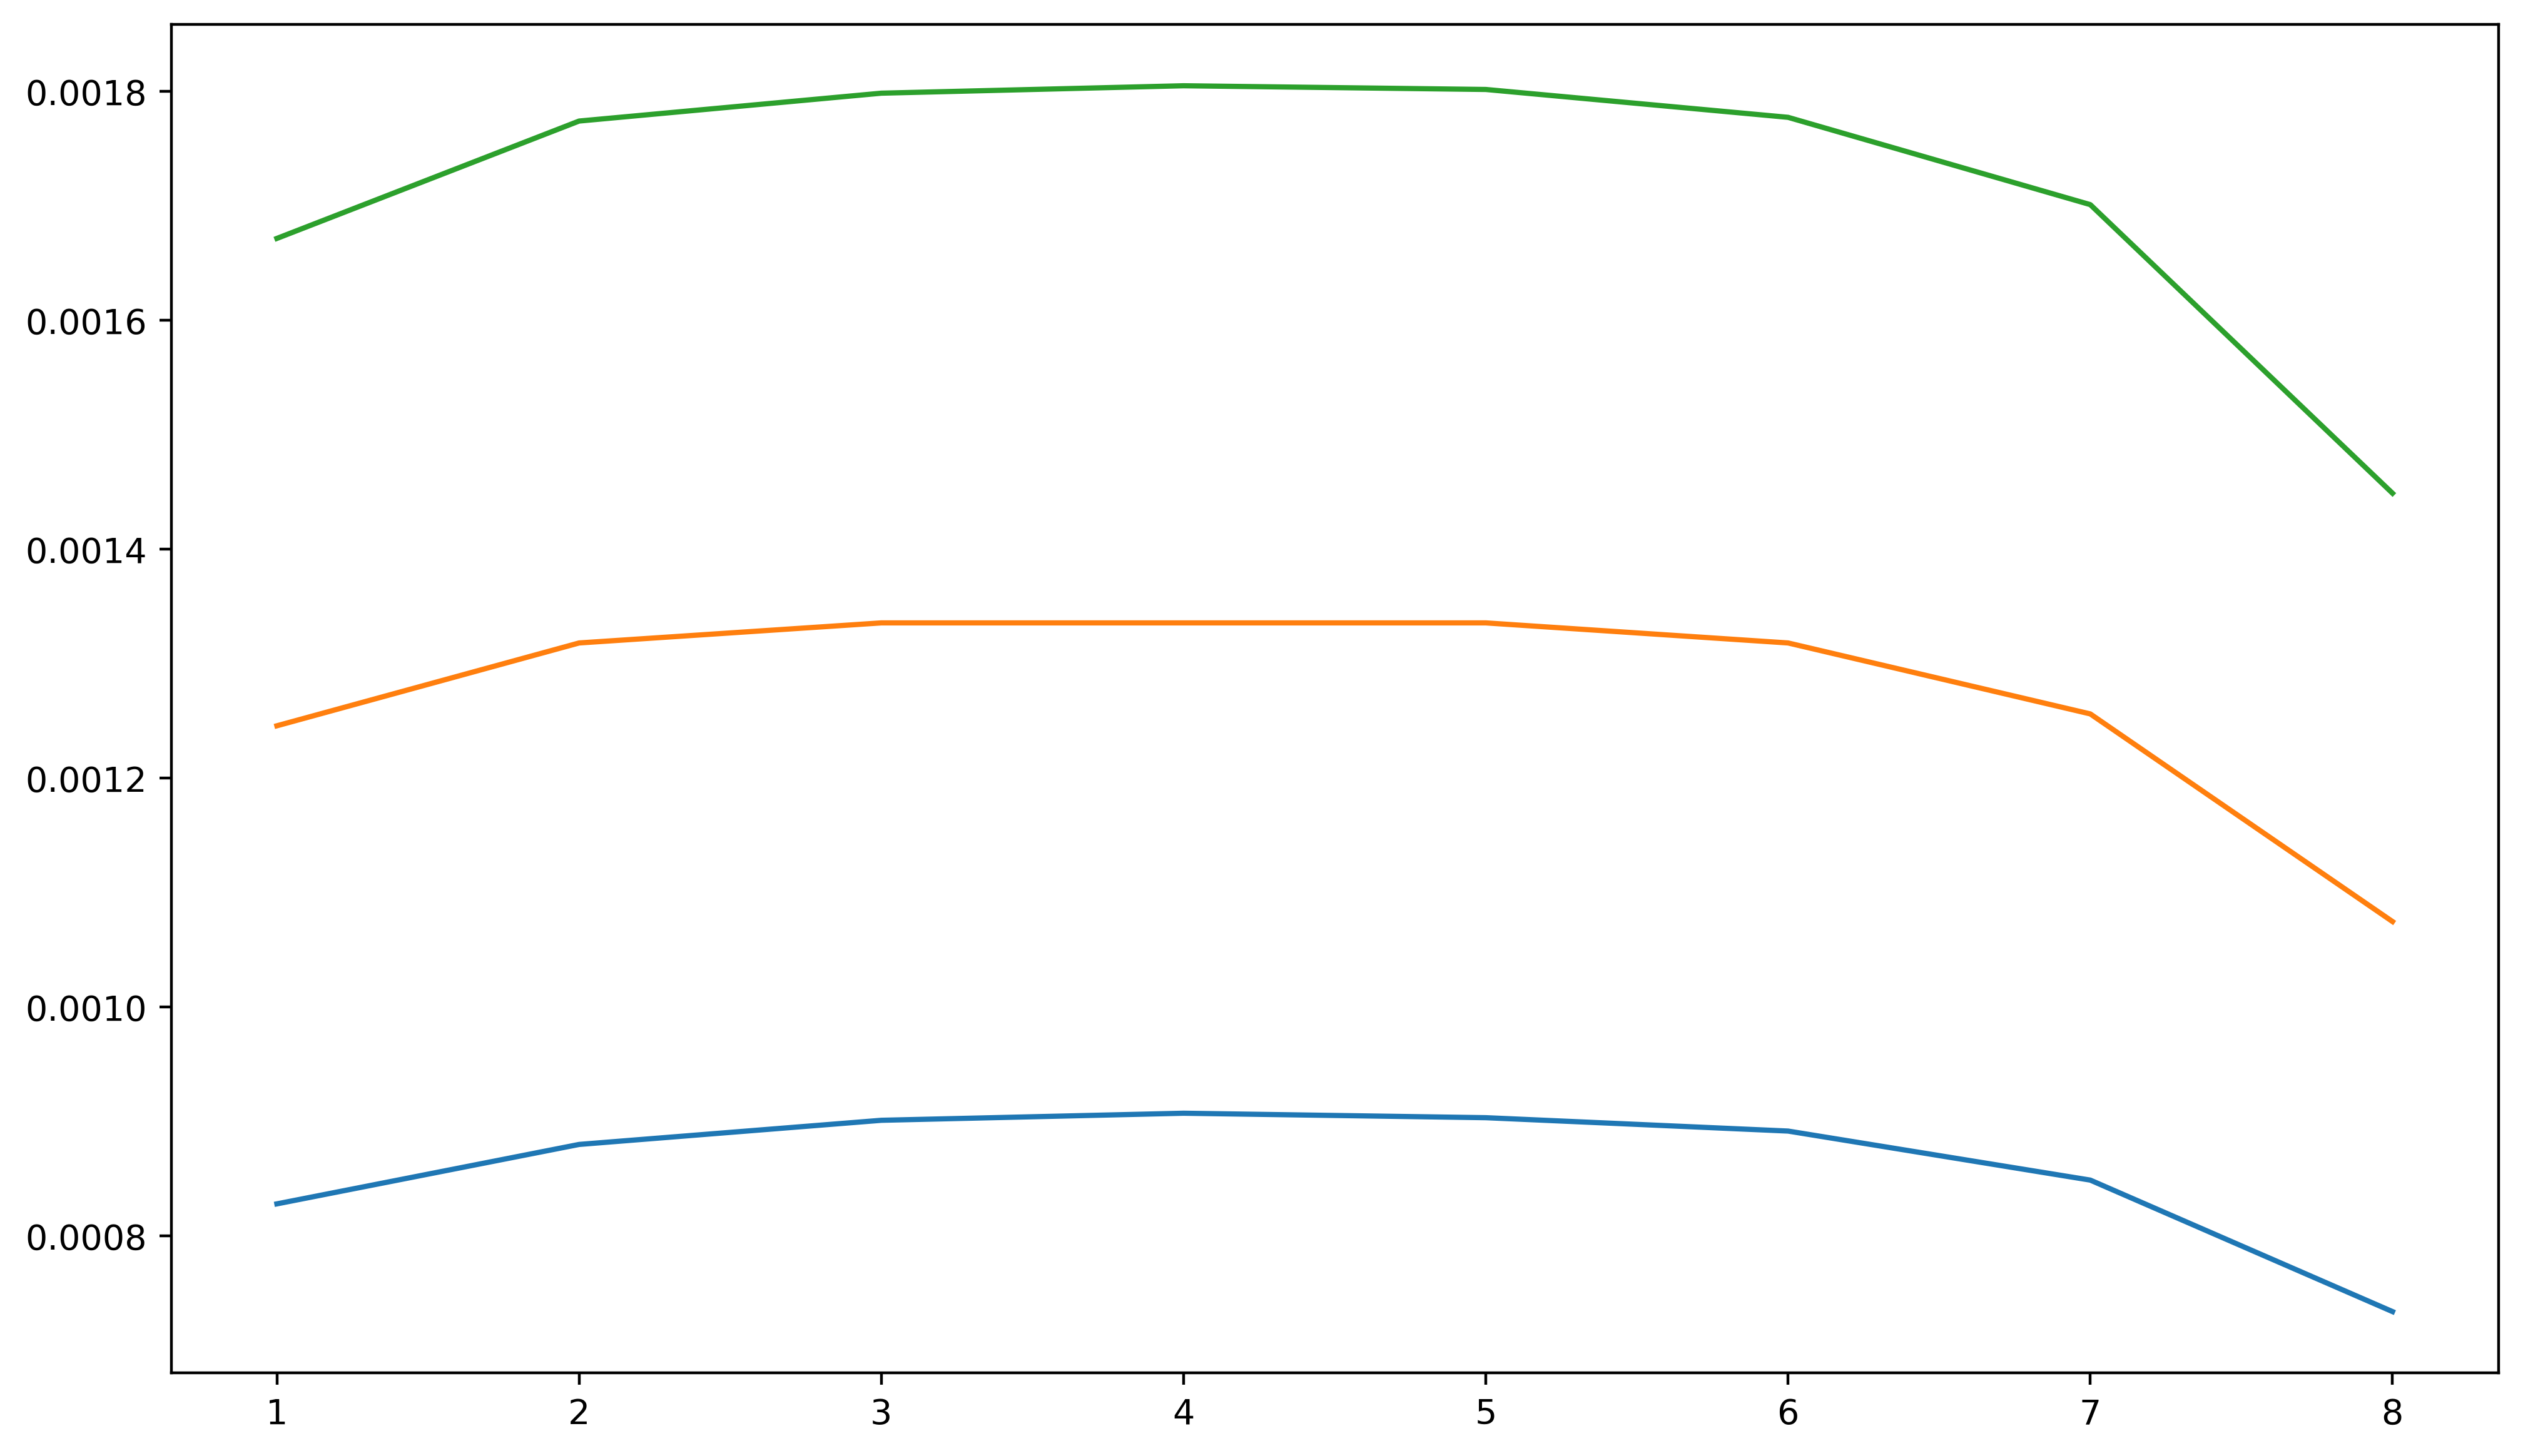

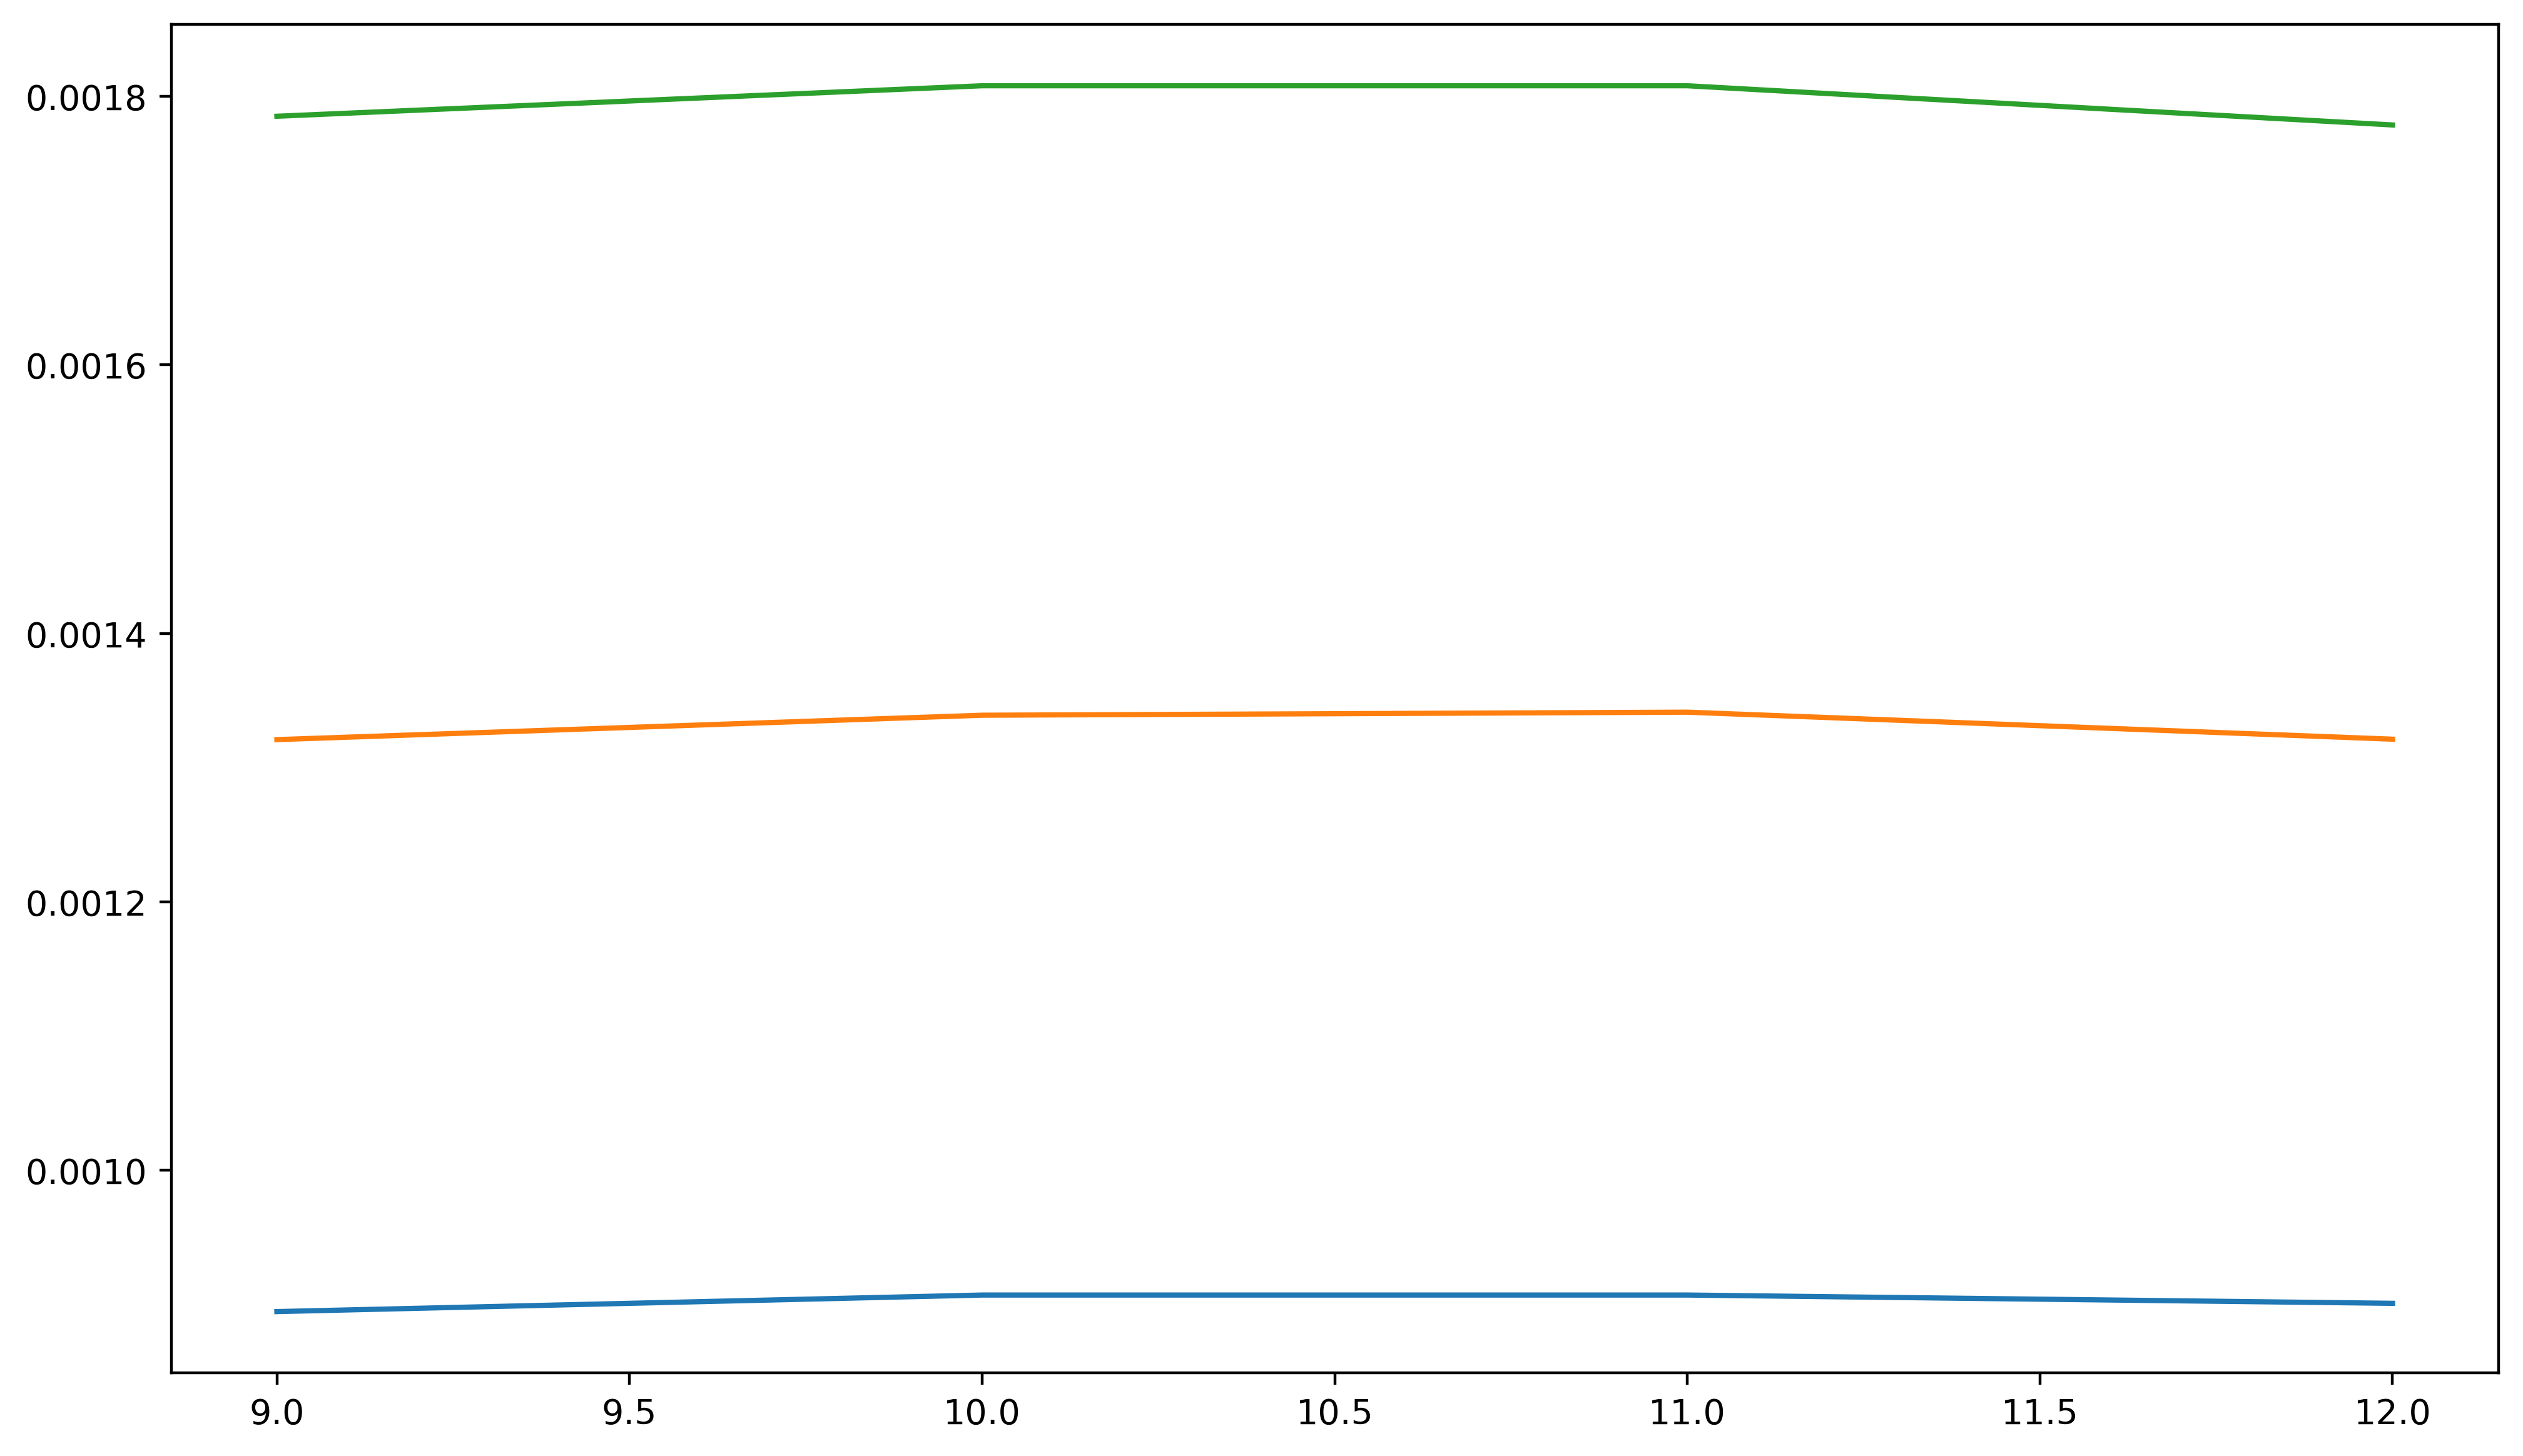

[]

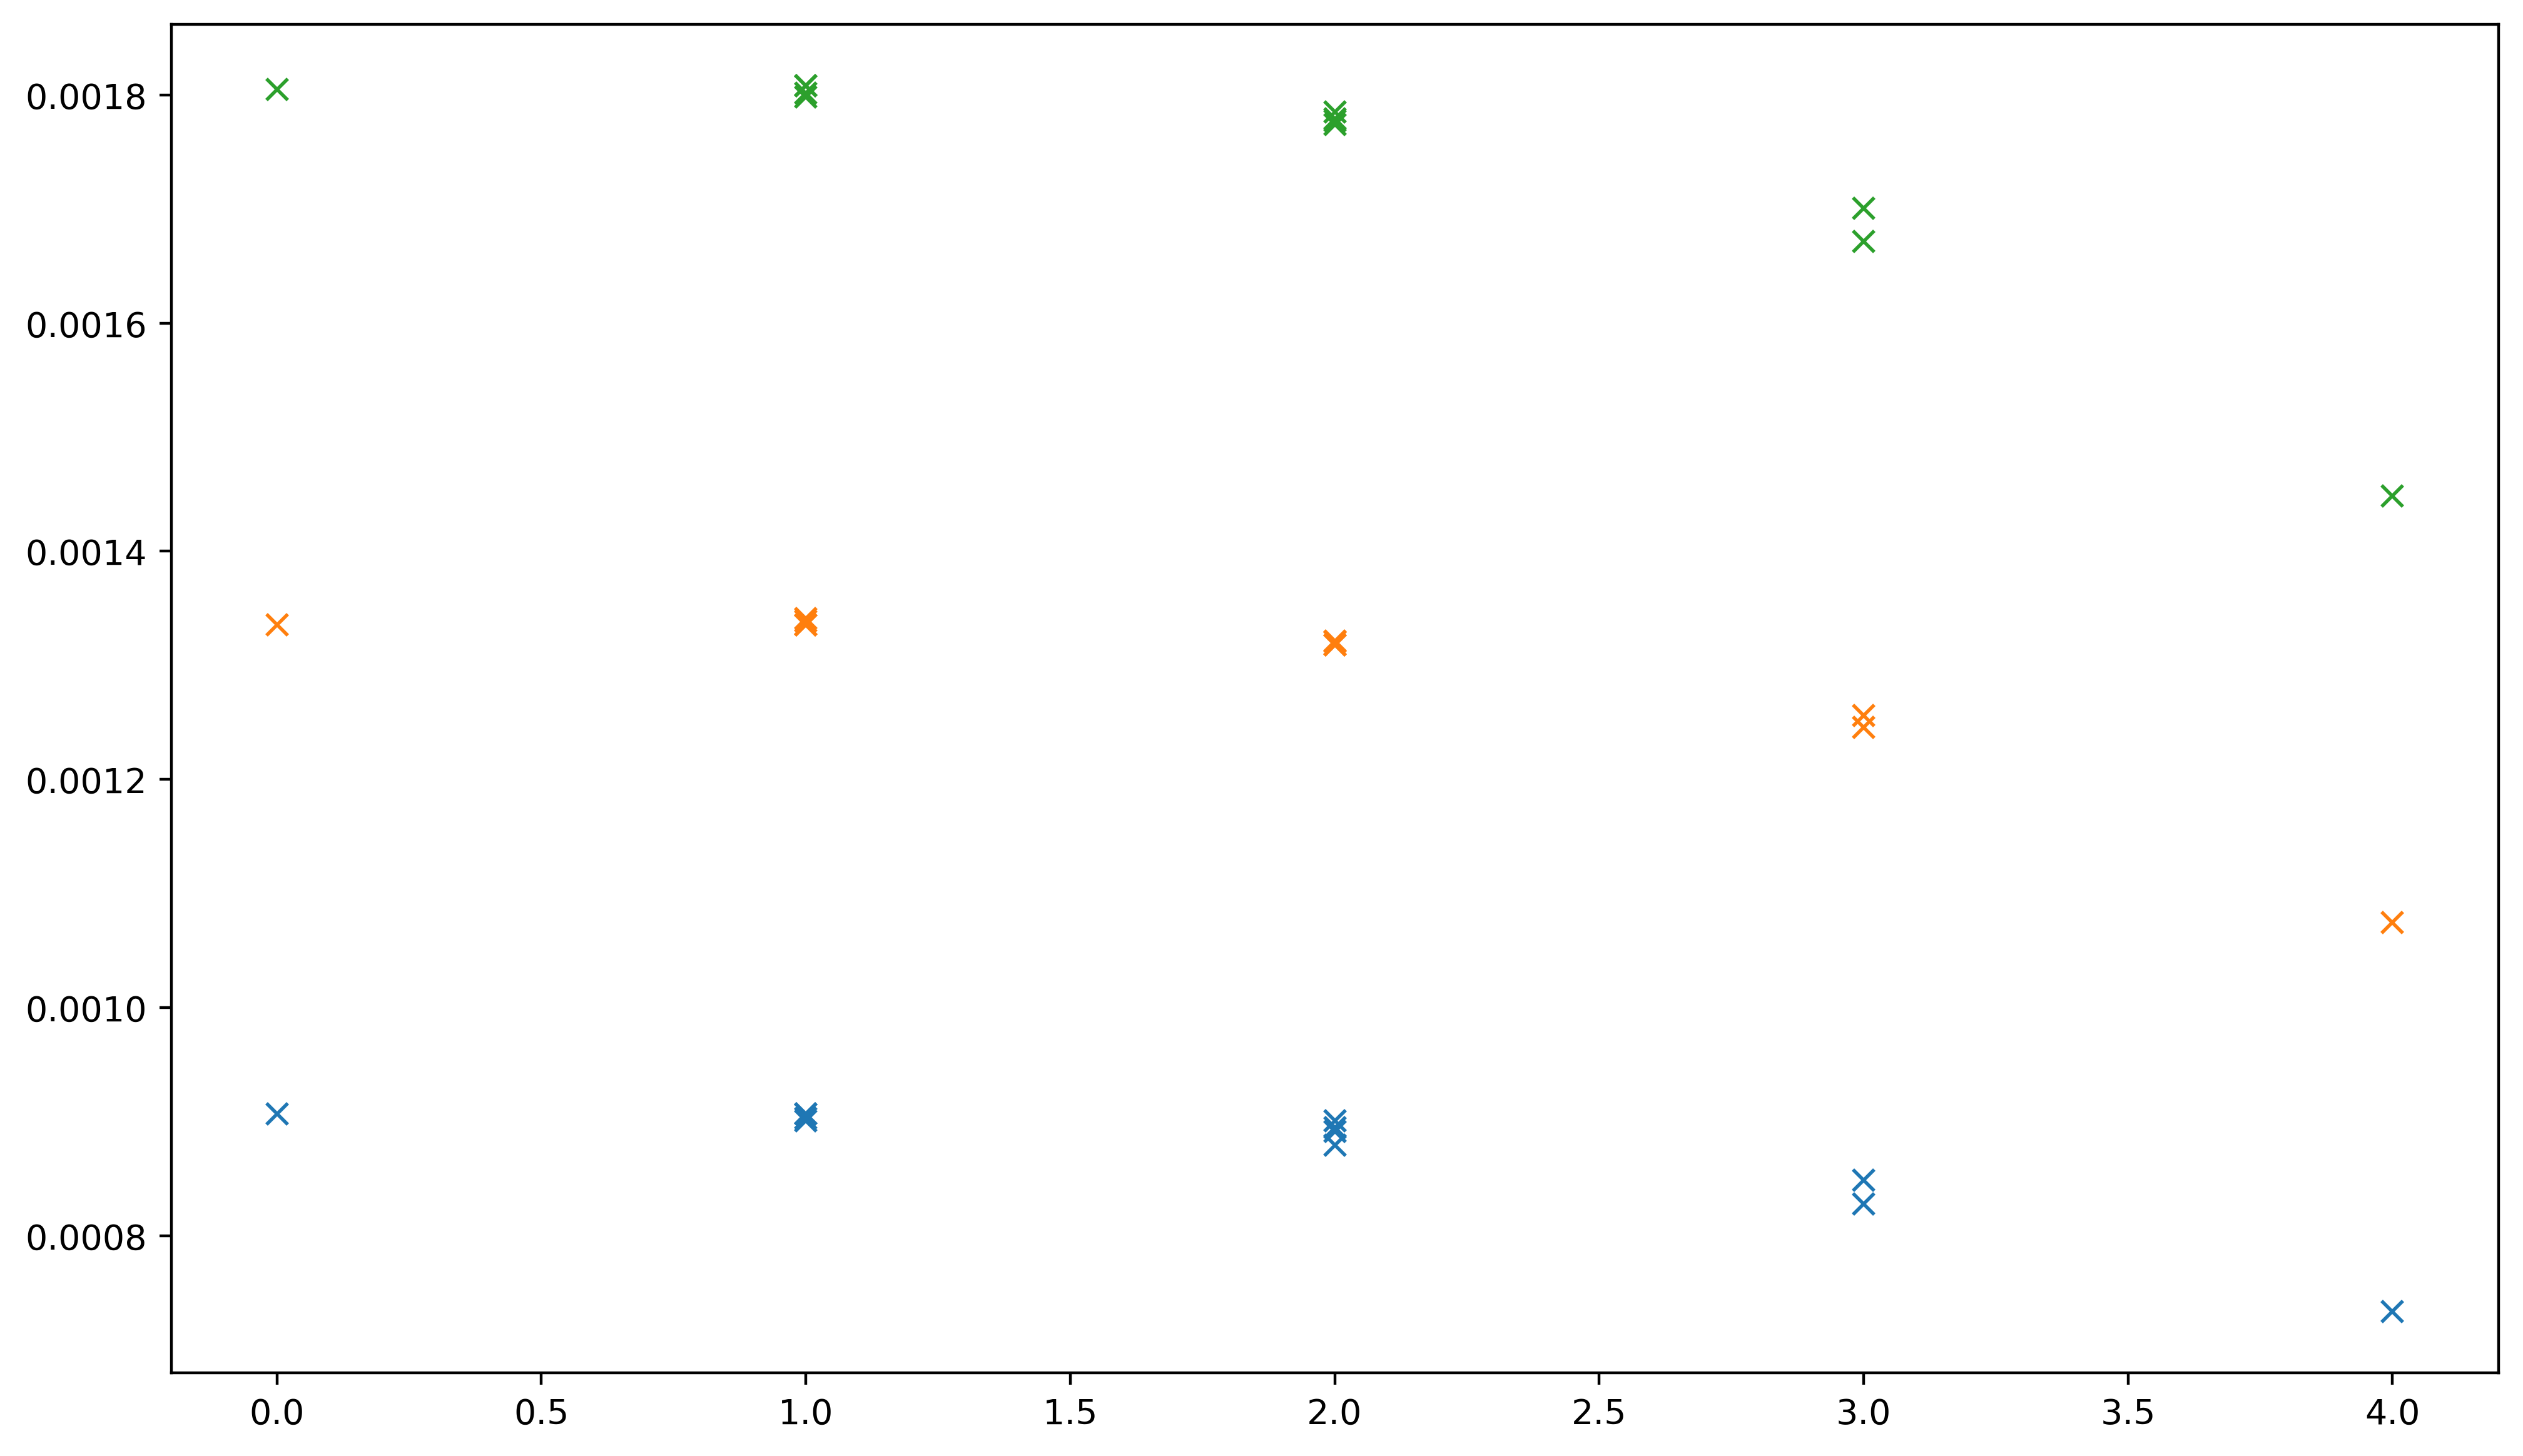

In [151]:
def B_helmh(U):
    return (m * U, np.sqrt((U * m_err)**2 + (m * U_error)**2)) # add error on B with gauss law

B, B_err = B_helmh(U_helmh * 10**(-3))
print(B[9])

plt.plot(pos[0:24:3], B[0:24:3])
plt.plot(pos[1:25:3], B[1:25:3])
plt.plot(pos[2:26:3], B[2:26:3])
plt.show()

plt.plot(pos[24:37:3], B[24:37:3])
plt.plot(pos[25:37:3], B[25:37:3])
plt.plot(pos[26:37:3], B[26:37:3])
plt.show()

for n in range(0, 3):
       plt.plot([0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4], [B[9 + n], B[6 + n], B[12 + n], B[27 + n], B[30 + n], B[3 + n], B[15 + n], B[24 + n], B[33 + n], B[0 + n], B[18 + n], B[21 + n]]  , "x")
plt.plot()

### Aufgabe 1.2: Elektronenkreisbahn

Bestimmen Sie den Durchmesser $d$ der Elektronenbahn im Fadenstrahlrohr in zwei Messreihen: 

 * Als als Funktion der Anodenspannung $U$ (z.B. mit sechs Messpunkten  $100$; $125$; $\ldots 250\,\mathrm{V}$) für zwei Spulenströme (z.B. $1\,\mathrm{A}$ und $2\,\mathrm{A}$).
 * Als Funktion des Spulenstroms $I$ (z.B. mit zehn Messpunkten $1,0$; $1,2$; $\ldots 2,0\,\mathrm{A}$) für zwei Anodenspannungen (z.B. $125\,\mathrm{V}$ und $250\,\mathrm{V}$).
 
---

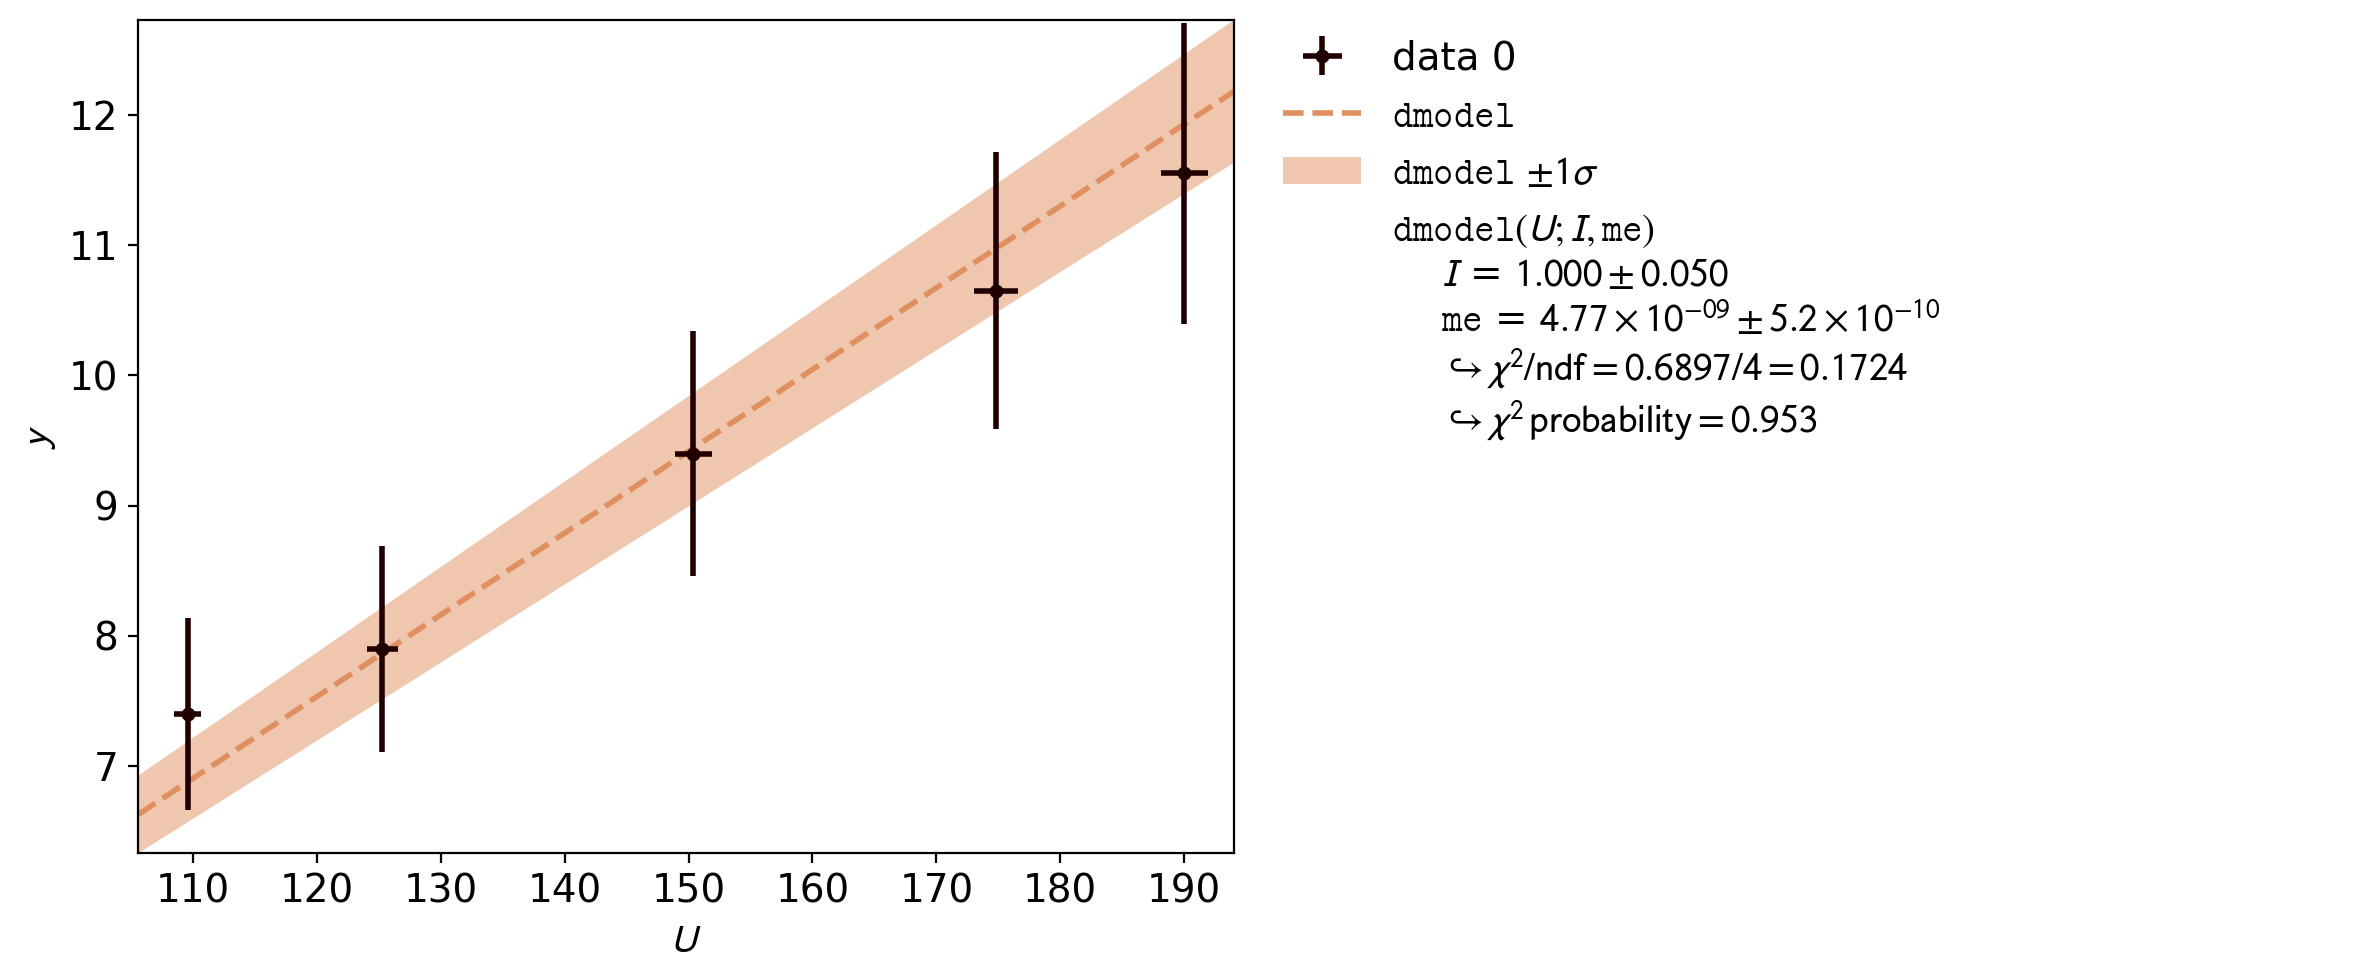

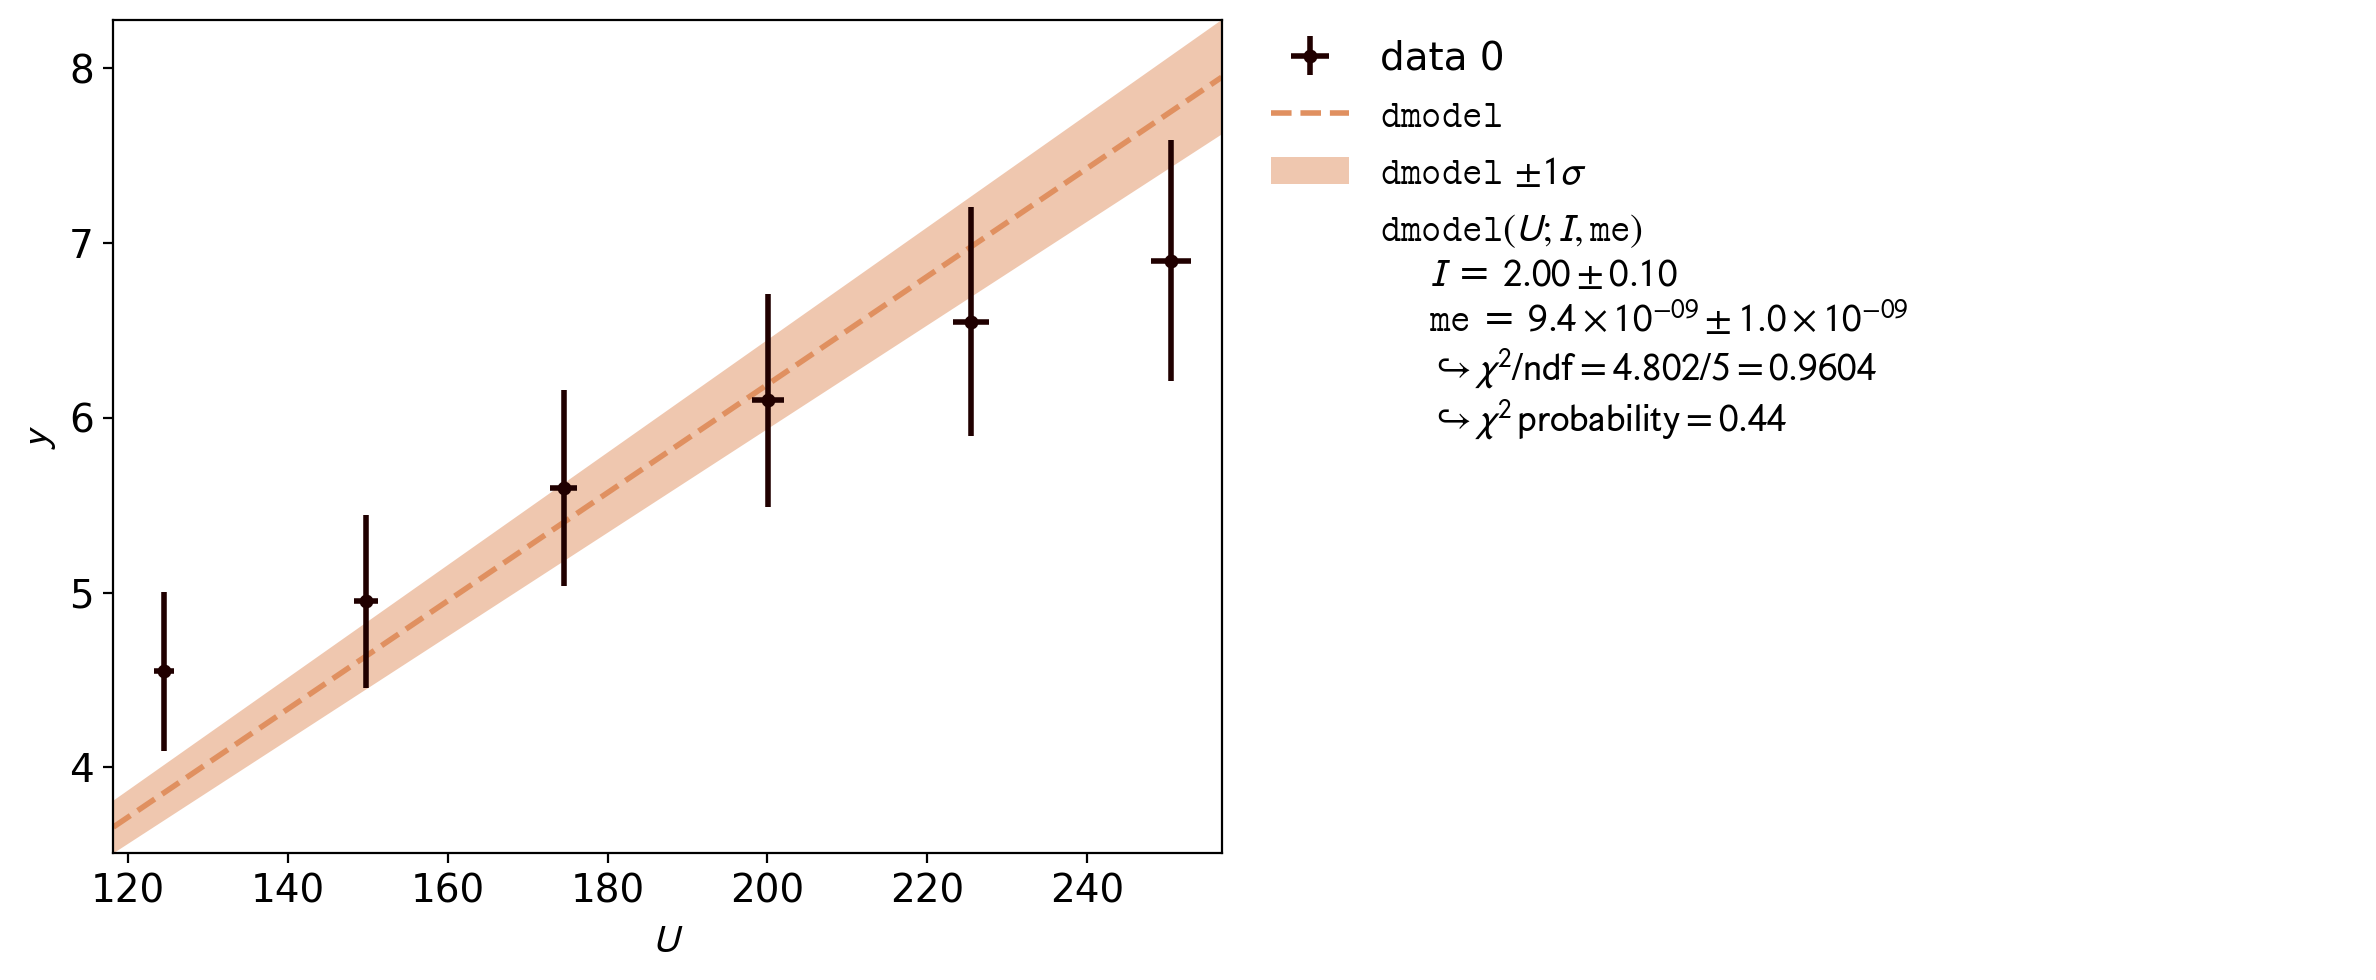

In [123]:
d_von_U = np.genfromtxt( "d_von_U.csv", delimiter=",", skip_header=1 ) # Einlesen der Daten, speichern in Variablen
U = d_von_U[:,0]
I = d_von_U[:,1]
d = d_von_U[:,2]

def dmodel(U, I, me): # x = U/I**2
    N = 130
    R = 0.15
    x = U/I**2
    return x * me * (125 * R**2) / (8 * mu**2 * N**2)

I_error = 0.05 # relative; nochmal beim Netzgerät nachschauen
U_error = 0.01 # relative; nochmal beim Netzgerät nachschauen, hier nicht die Hall Spannung
d_error = 0.1 # relative

#first with data for which I = 1A
fit = kafe2.XYFit(xy_data=[U[:5], d[:5]], model_function=dmodel) 
fit.add_error(axis='y', err_val=d_error, relative=True)
fit.add_error(axis='x', err_val=U_error, relative=True)

fit.add_parameter_constraint(name='I',   value=1,   uncertainty=I_error, relative=True)

fit.do_fit()
plot = kafe2.Plot(fit)
plot.plot()
plot.show()

#now with data for which I = 2A
fit = kafe2.XYFit(xy_data=[U[5:], d[5:]], model_function=dmodel) 
fit.add_error(axis='y', err_val=d_error, relative=True)
fit.add_error(axis='x', err_val=U_error, relative=True)

fit.add_parameter_constraint(name='I', value=2, uncertainty=I_error, relative=True)

fit.do_fit()
plot = kafe2.Plot(fit)
plot.plot()
plot.show()



Wert bei 250A und 1 V-1,2V konnte nicht bestimmt werden.

In [93]:
"""d_von_U = np.genfromtxt( "d_von_U.csv", delimiter=",", skip_header=1 ) # Einlesen der Daten, speichern in Variablen
U = d_von_U[:,0]
I = d_von_U[:,1]
d = d_von_U[:,2]

def dmodel(U, I, me): # x = U/I**2
    N = 130
    R = 0.15
    x = U 
    return x * me * (125 * R**2) / (8 * mu**2 * N**2)


d_error = 0.1 # relative


#first with data for which I = 1A
fit = kafe2.XYFit(xy_data=[U[:7], d[:7]], model_function=dmodel) 
fit.add_error(axis='y', err_val=d_error, relative=True)
fit.add_error(axis='x', err_val=U_error, relative=True)

fit.add_parameter_constraint(name=I, value=1, uncertainty=I_error, relative=True)

fit.do_fit()
plot = kafe2.Plot(fit)
plot.plot()
plot.show()

#now with data for which I = 2A
fit = kafe2.XYFit(xy_data=[U[7:13], d[7:13]], model_function=d) 
fit.add_error(axis='y', err_val=d_error, relative=True)
fit.add_error(axis='x', err_val=U_error, relative=True)

fit.add_parameter_constraint(name=I, value=2, uncertainty=I_error, relative=True)

fit.do_fit()
plot = kafe2.Plot(fit)
plot.show()"""

'd_von_U = np.genfromtxt( "d_von_U.csv", delimiter=",", skip_header=1 ) # Einlesen der Daten, speichern in Variablen\nU = d_von_U[:,0]\nI = d_von_U[:,1]\nd = d_von_U[:,2]\n\ndef dmodel(U, I, me): # x = U/I**2\n    N = 130\n    R = 0.15\n    x = U \n    return x * me * (125 * R**2) / (8 * mu**2 * N**2)\n\n\nd_error = 0.1 # relative\n\n\n#first with data for which I = 1A\nfit = kafe2.XYFit(xy_data=[U[:7], d[:7]], model_function=dmodel) \nfit.add_error(axis=\'y\', err_val=d_error, relative=True)\nfit.add_error(axis=\'x\', err_val=U_error, relative=True)\n\nfit.add_parameter_constraint(name=I, value=1, uncertainty=I_error, relative=True)\n\nfit.do_fit()\nplot = kafe2.Plot(fit)\nplot.plot()\nplot.show()\n\n#now with data for which I = 2A\nfit = kafe2.XYFit(xy_data=[U[7:13], d[7:13]], model_function=d) \nfit.add_error(axis=\'y\', err_val=d_error, relative=True)\nfit.add_error(axis=\'x\', err_val=U_error, relative=True)\n\nfit.add_parameter_constraint(name=I, value=2, uncertainty=I_error, rel

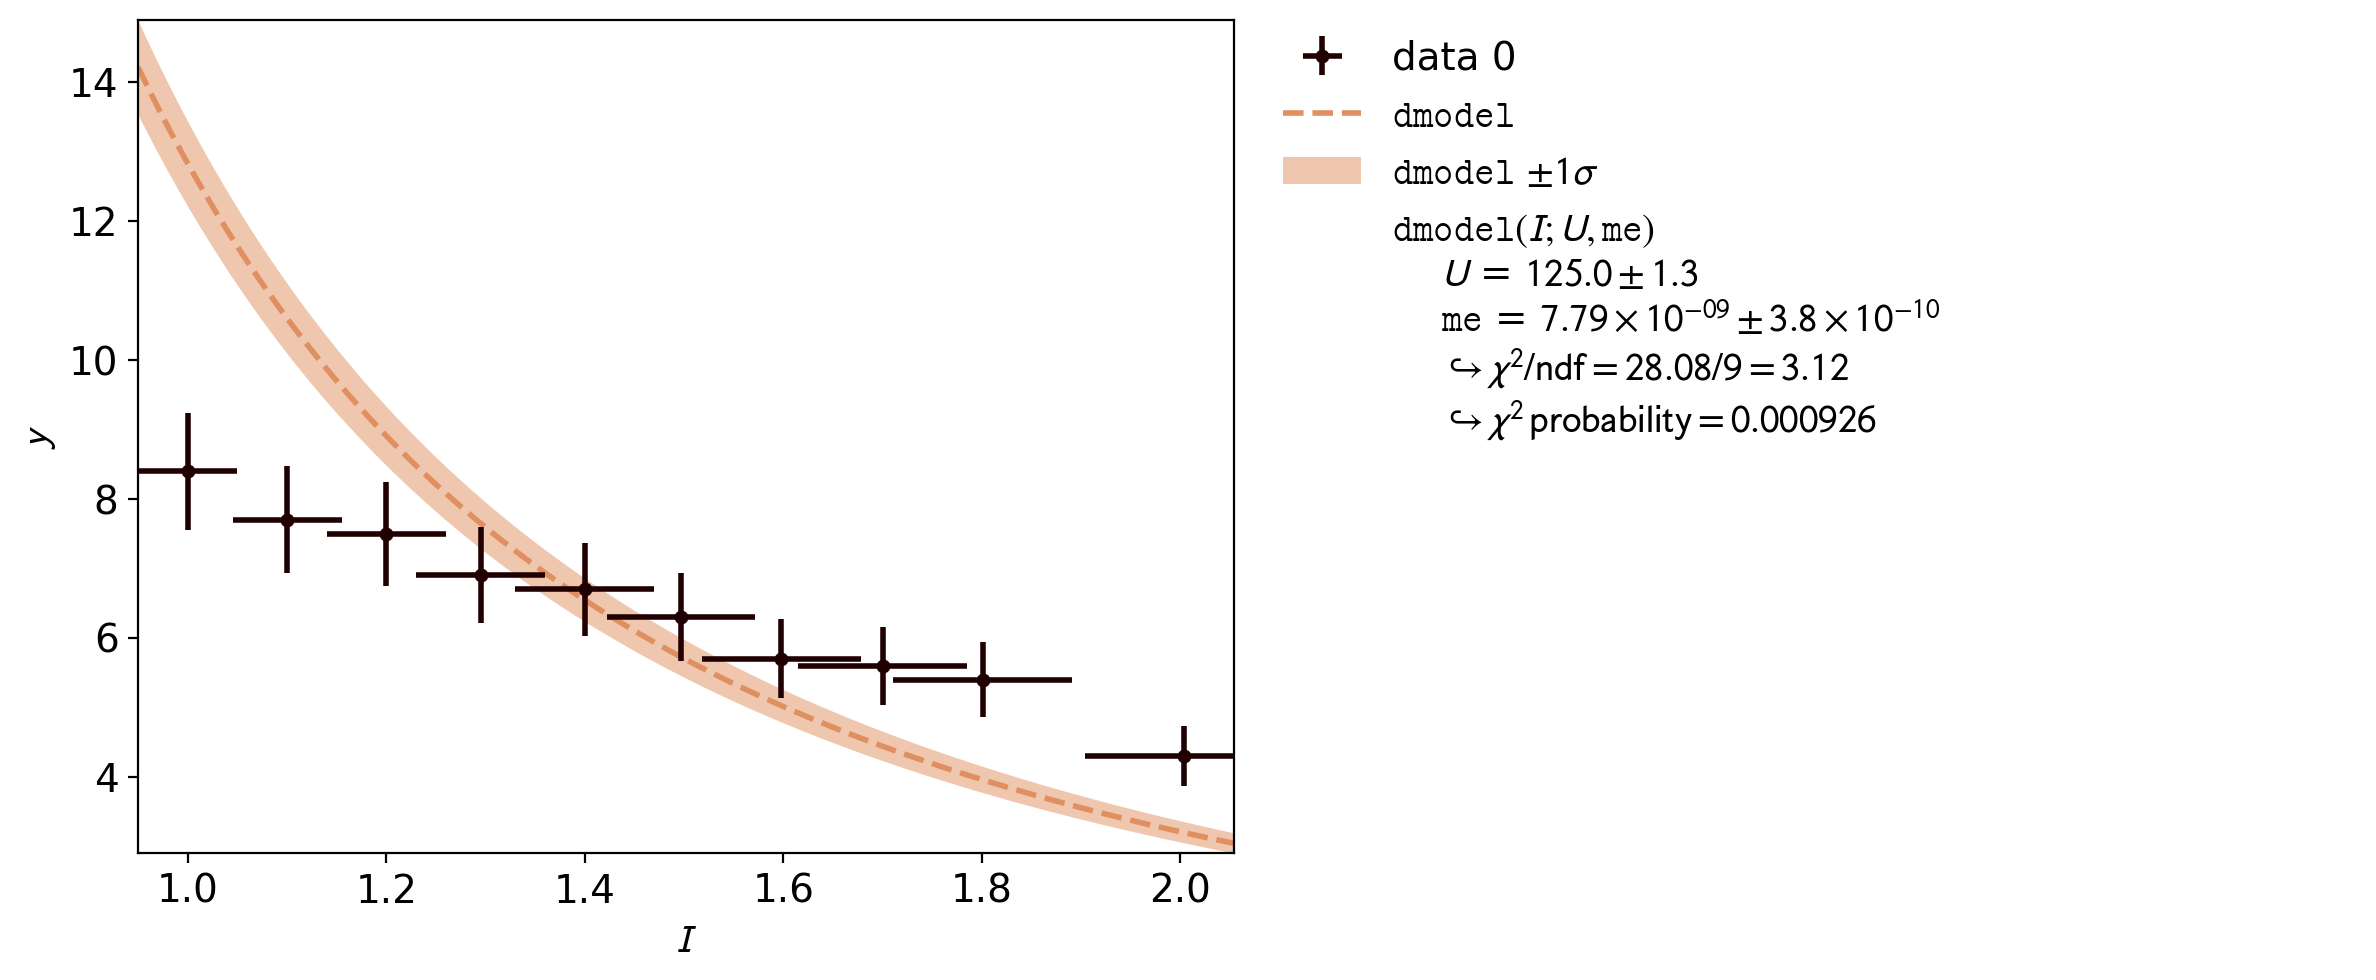

[1.298 1.41  1.498 1.599 1.7   1.797 2.   ] [1.    1.1   1.2   1.295 1.4   1.497 1.598 1.7   1.801 2.004]


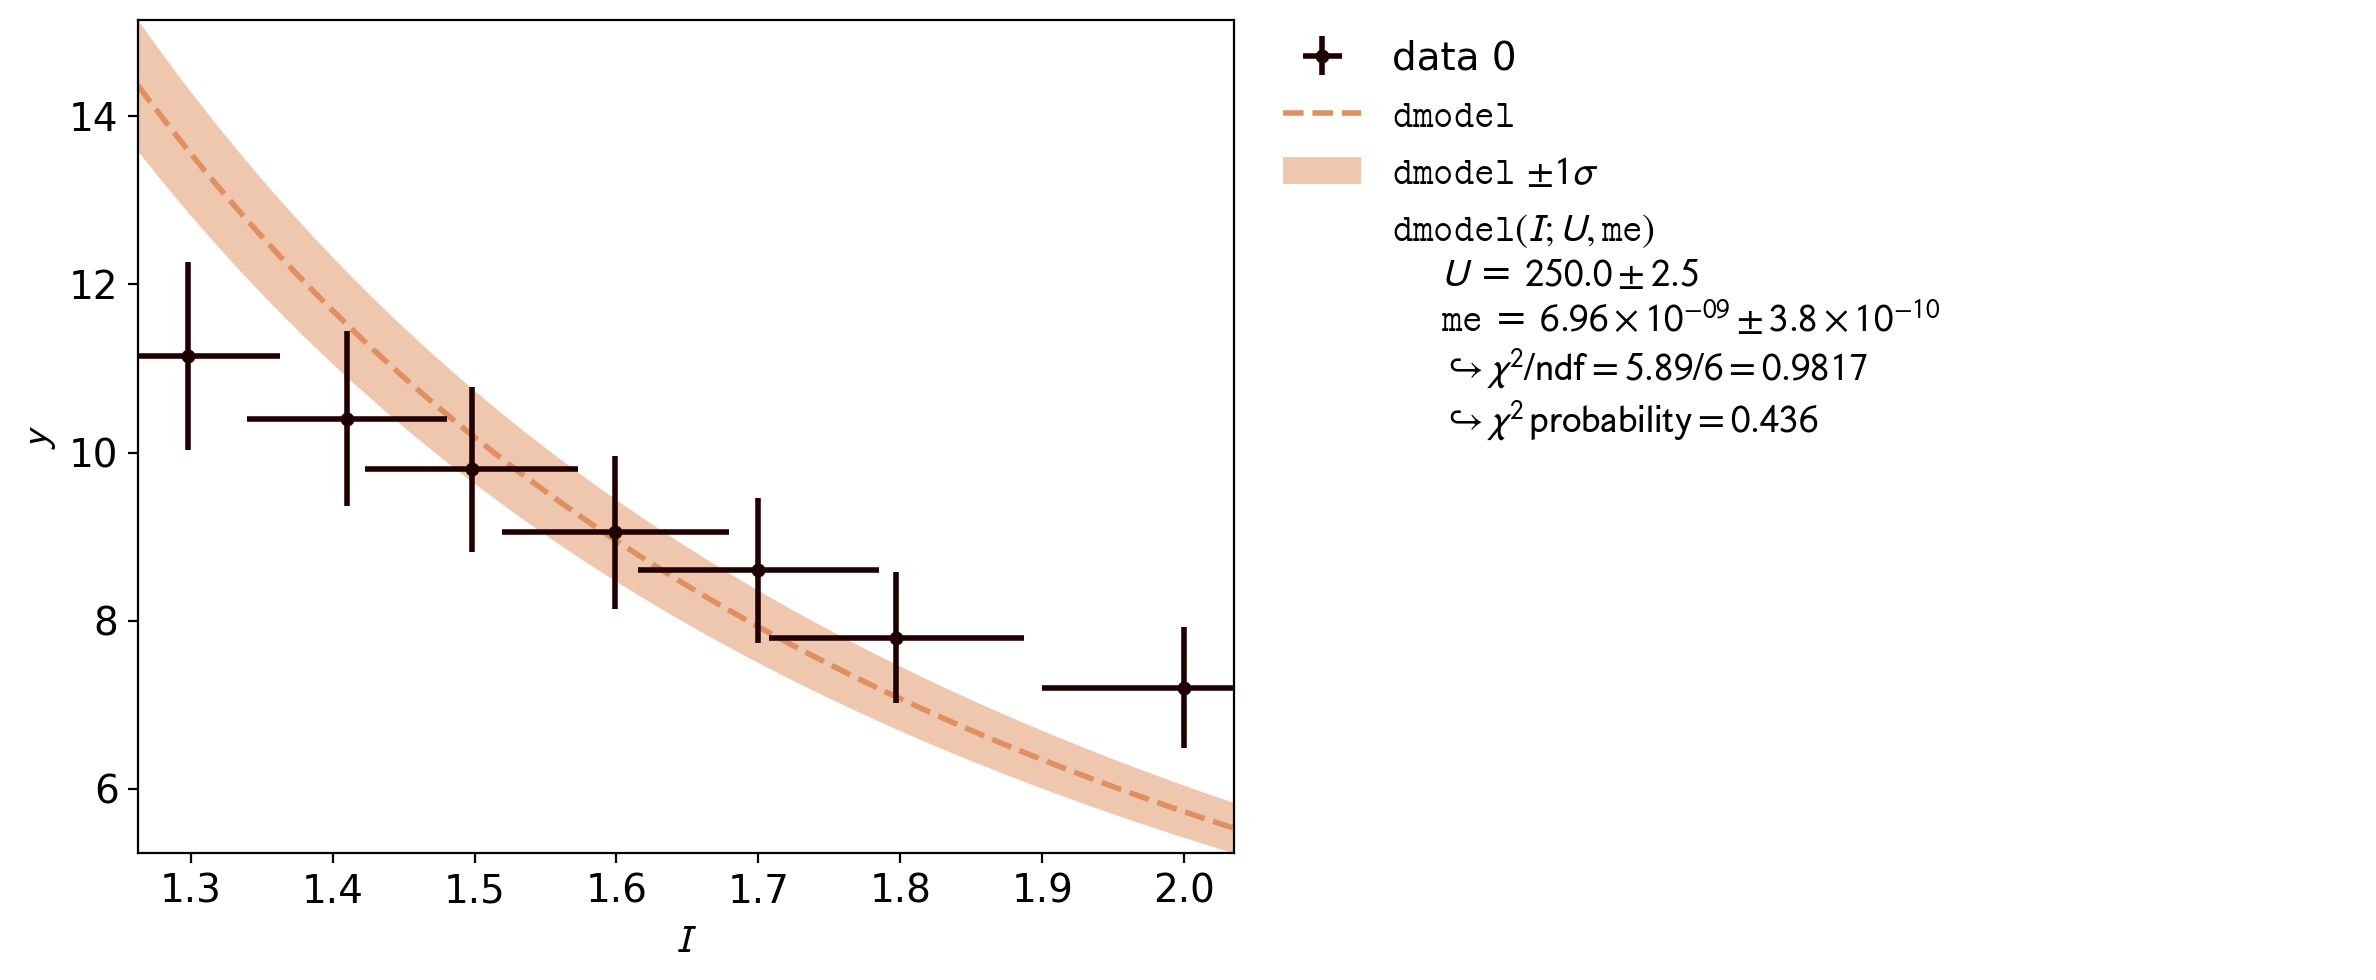

In [143]:
d_von_U = np.genfromtxt( "d_von_I.csv", delimiter=",", skip_header=1 ) # Einlesen der Daten, speichern in Variablen
U = d_von_U[:,0]
I = d_von_U[:,1]
d = d_von_U[:,2]

def dmodel(I, U, me): # x = U/I**2
    N = 130
    R = 0.15
    x = U/I**2 
    return x * me * (125 * R**2) / (8 * mu**2 * N**2)

I_error = 0.05 # relative; nochmal beim Netzgerät nachschauen
U_error = 0.01 # relative; nochmal beim Netzgerät nachschauen, hier nicht die Hall Spannung
d_error = 0.1 # relative

#first with data for which I = 1A
fit = kafe2.XYFit(xy_data=[I[:10], d[:10]], model_function=dmodel) 
fit.add_error(axis='y', err_val=d_error, relative=True)
fit.add_error(axis='x', err_val=I_error, relative=True)

fit.add_parameter_constraint(name='U',   value=125,   uncertainty=U_error, relative=True)

fit.do_fit()
plot = kafe2.Plot(fit)
plot.plot()
plot.show()
print(I[10:], I[:10])
#now with data for which I = 2A
fit = kafe2.XYFit(xy_data=[I[10:], d[10:]], model_function=dmodel) 
fit.add_error(axis='y', err_val=d_error, relative=True)
fit.add_error(axis='x', err_val=I_error, relative=True)

fit.add_parameter_constraint(name='U', value=250, uncertainty=U_error, relative=True)

fit.do_fit()
plot = kafe2.Plot(fit)
plot.plot()
plot.show()

## Aufgabe 2: Methode von Busch

**Hinweise zu allen hier durchzuführenden Messungen finden Sie in der Datei [Hinweise-Aufgabe-2.md](https://git.scc.kit.edu/etp-lehre/p1-for-students/-/blob/main/Spezifische_Lading_des_Elektrons/doc/Hinweise-Aufgabe-2.md).**

### Aufgabe 2.1: Vorbereitung der Messung

Machen Sie sich mit der Methode zur Bestimmung der von $e/m_{e}$ nach der Methode von Busch vertraut. Verändern Sie hierzu bei vorgegebener Beschleunigungsspannung $U_{z}$ den Spulenstrom, und erklären Sie Ihre Beobachtungen mit eigenen Worten.

---

**Lösung:**

*Sie können Ihr Protokoll direkt in dieses Dokument einfügen. Wenn Sie dieses Dokument als Grundlage für ein [Jupyter notebook](https://jupyter.org/) verwenden wollen können Sie die Auswertung, Skripte und ggf. bildliche Darstellungen mit Hilfe von [python](https://www.python.org/) ebenfalls hier einfügen. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument.* 

---

### Aufgabe 2.2: Bestimmung von $e/m_{\mathrm{e}}$ 

Messen Sie für Beschleunigungsspannungen von $U = 200\,\ldots 700\,\mathrm{V}$ (in Schritten von $50\,\mathrm{V}$) den nötigen Spulenstrom $I$, um auf dem Schirm einen Signalpunkt zu erzeugen. Gehen Sie dabei, für jeden Messpunkt so, wie in Aufgabe 2.1 vor. Tragen Sie $U$ geeignet über $I^{2}$ auf und ermitteln Sie daraus $e/m_{\mathrm{e}}$. 

---

**Lösung:**

*Sie können Ihr Protokoll direkt in dieses Dokument einfügen. Wenn Sie dieses Dokument als Grundlage für ein [Jupyter notebook](https://jupyter.org/) verwenden wollen können Sie die Auswertung, Skripte und ggf. bildliche Darstellungen mit Hilfe von [python](https://www.python.org/) ebenfalls hier einfügen. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument.* 

---

In [37]:
# bestimme zuerst konstante K * (ds - d2) für den Mittelwert des Magnetfeldes
l = 0.2  # +- 0.0005
R = 0.045 # +-0.0005
N = 3000
d2 = 0.08 # +- 0.001
ds = 0.15
def B(a):
    return mu * N / l * 0.567 * (a/np.sqrt(R**2 + a**2) + (l - a)/np.sqrt(R**2 + (l - a)**2))
k =  scipy.integrate.quad(B, d2, ds)

In [53]:
k0 = k[0]#0.0013435370205851793

k1 = 0.0013412079923252028 # + in l
k2 = 0.0013458624795267087 # - in l

k3 = 0.0013407491868634852 # + in R
k4 = 0.0013463147265669803 # - in R

k5 = 0.0013242059973940048 # + in d2
k6 = 0.0013628503364845855 # - in d2

dk = np.sqrt((k1-k0)**2 + (k2-k0)**2 + (k3-k0)**2 + (k4-k0)**2 + (k5-k0)**2 + (k6-k0)**2 + (k[1])**2) # systematic and numerical error on k
print(dk)

2.7803101049229007e-05


[0.202 0.239 0.271 0.299 0.319 0.333 0.359 0.379 0.394 0.404 0.421]


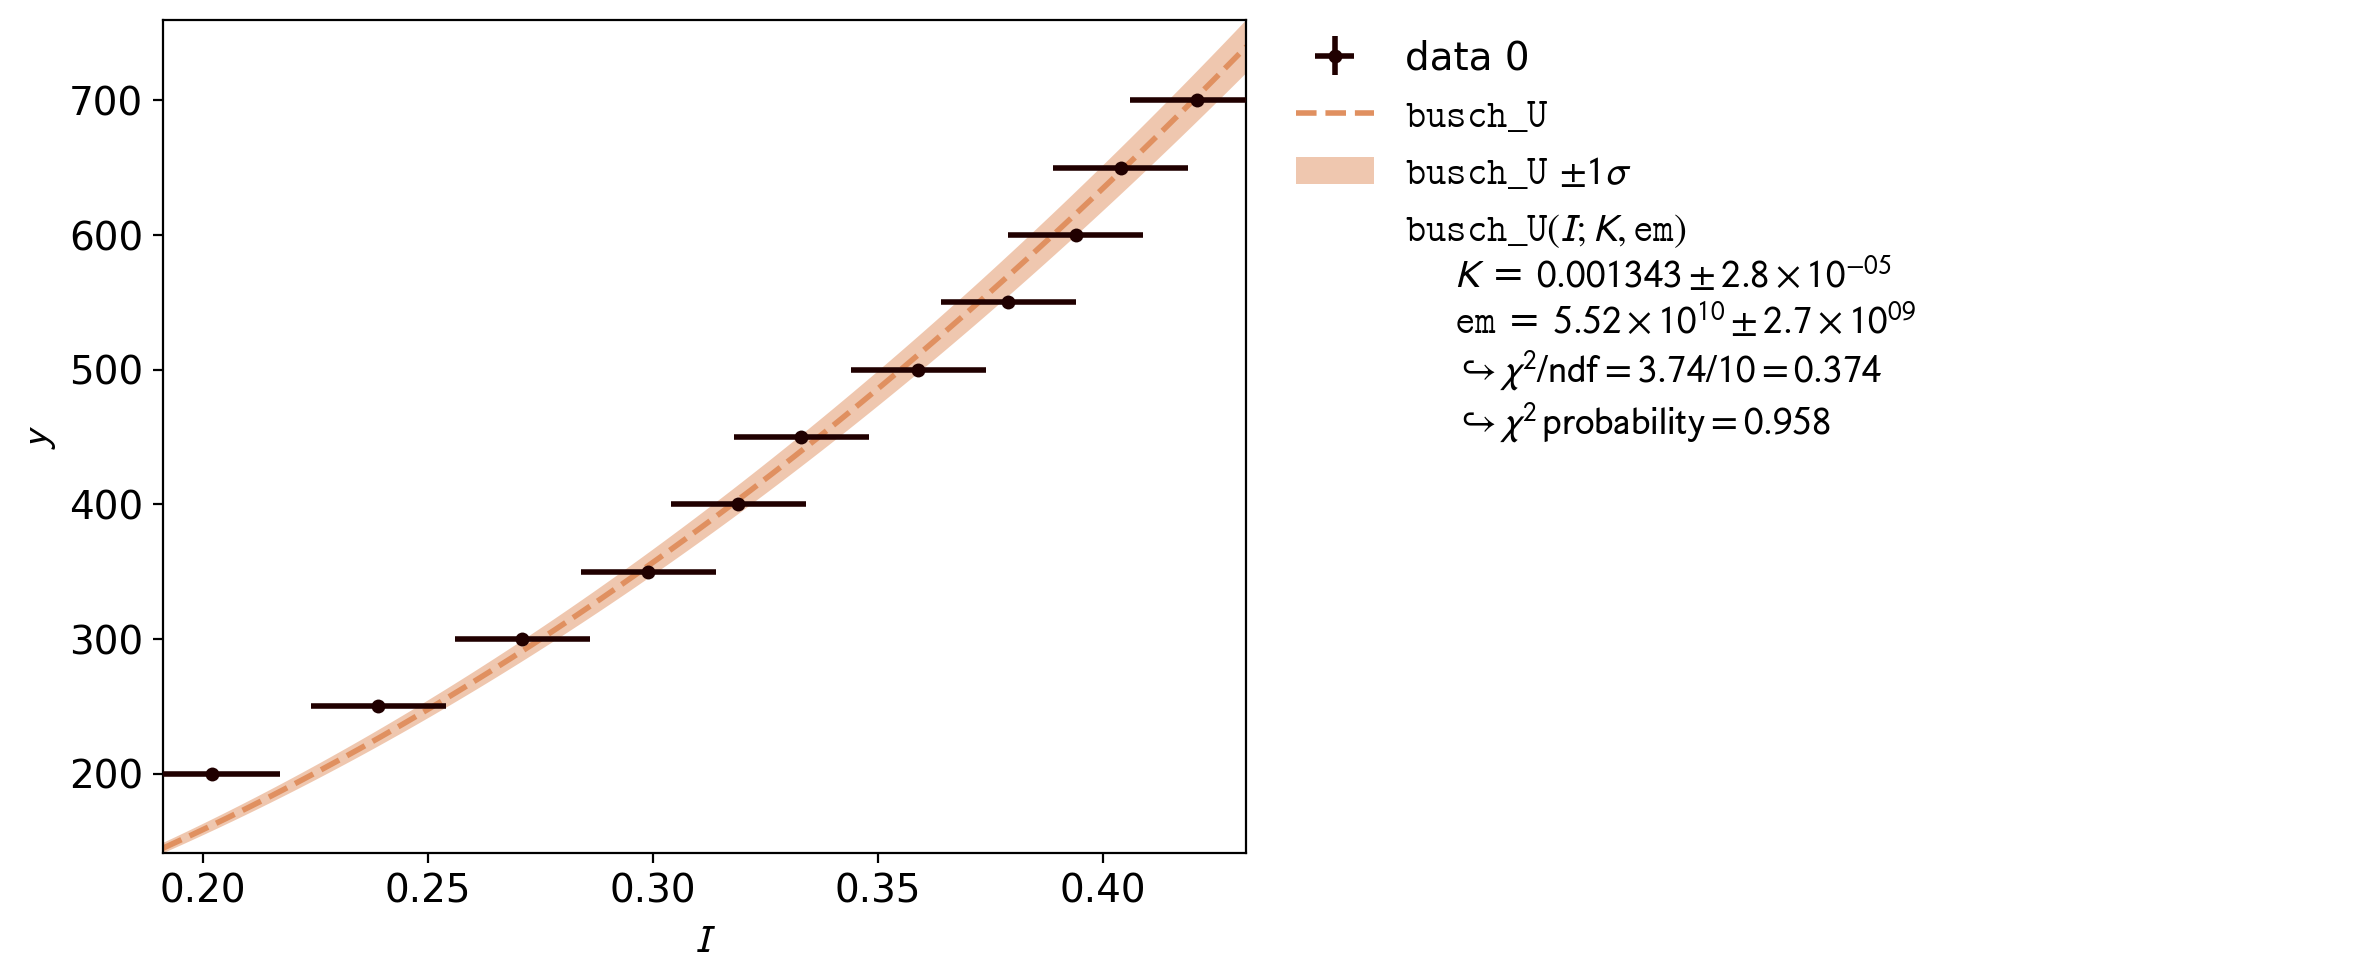

In [72]:
busch_data = np.genfromtxt("busch.csv", delimiter=",", skip_header=1 )
U_b = busch_data[:,0]
I_b = busch_data[:,1]
print(I_b)

def busch_U(I, K, em):
    return 1/(np.pi * 8) * K**2 * em * I**2

I_error = 0.015
U_error = 1

fit = kafe2.XYFit(xy_data=[I_b, U_b], model_function=busch_U) 
fit.add_error(axis='y', err_val=U_error)
fit.add_error(axis='x', err_val=I_error)

fit.add_parameter_constraint(name="K", value=k0, uncertainty=dk)

fit.do_fit()
plot = kafe2.Plot(fit)
plot.plot()
plot.show()